In [144]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [145]:
MAIN_PATH = '/kaggle/input/titanic/'
train_df = pd.read_csv(MAIN_PATH + 'train.csv')
test_df = pd.read_csv(MAIN_PATH + 'test.csv')
sub = pd.read_csv(MAIN_PATH + 'gender_submission.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")
print(train_df.head())

Train shape: (891, 12)
Test shape: (418, 11)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0  

Pclass = Ticket Class

SibSp = # of siblings / spouses aboard the Titanic

Parch = # of parents / children aboard the Titanic

Ticket = Ticket number

Fare = Passenger fare

Cabin = Cabin number

Embarked = Port of Embarkation

In [146]:
print(f"Train_df columns:")
print(train_df.columns.tolist())
print(f"Test_df columns:")
print(test_df.columns.tolist())

Train_df columns:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Test_df columns:
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [147]:
print(f"NaN values in train_df:")
print(train_df.isnull().sum().sort_values(ascending=False))
print('------------------------------------')
print(train_df.isnull().mean().sort_values(ascending=False))

NaN values in train_df:
Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64
------------------------------------
Cabin          0.771044
Age            0.198653
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
Survived       0.000000
PassengerId    0.000000
dtype: float64


In [148]:
print(f"NaN values in test_df:")
print(test_df.isnull().sum().sort_values(ascending=False))
print('------------------------------------')
print(test_df.isnull().mean().sort_values(ascending=False))

NaN values in test_df:
Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64
------------------------------------
Cabin          0.782297
Age            0.205742
Fare           0.002392
Embarked       0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64


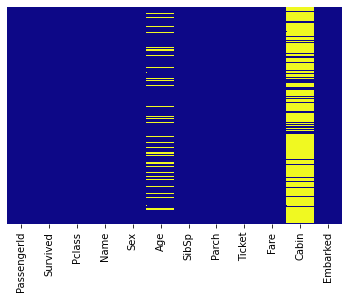

In [149]:
sns.heatmap(train_df.isnull(), yticklabels = False, cbar=False, cmap='plasma')

0.38

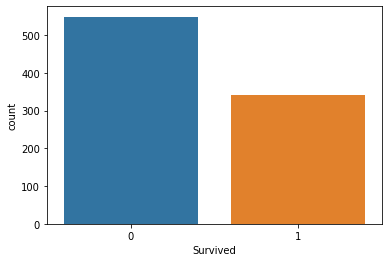

In [150]:
sns.countplot(train_df['Survived'])
round(np.mean(train_df['Survived']), 2)

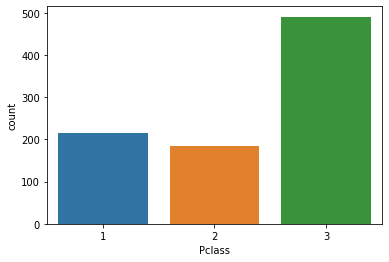

In [151]:
sns.countplot(train_df['Pclass'])

In [152]:
train_df.Name.value_counts()

Johnston, Mr. Andrew G                1
Meyer, Mr. Edgar Joseph               1
Kelly, Miss. Mary                     1
McGovern, Miss. Mary                  1
Fox, Mr. Stanley Hubert               1
                                     ..
Harmer, Mr. Abraham (David Lishin)    1
Trout, Mrs. William H (Jessie L)      1
Johansson, Mr. Gustaf Joel            1
Crosby, Miss. Harriet R               1
Hamalainen, Mrs. William (Anna)       1
Name: Name, Length: 891, dtype: int64

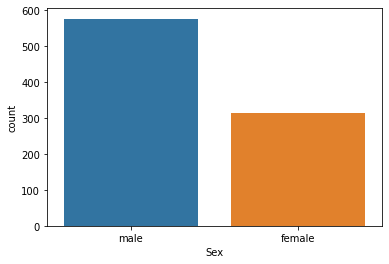

In [153]:
sns.countplot(train_df['Sex'])

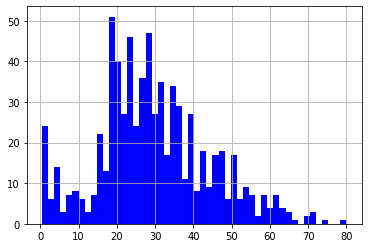

In [154]:
train_df['Age'].hist(bins = 50, color = 'blue')

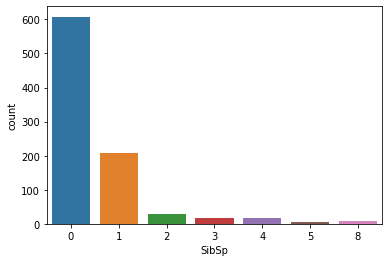

In [155]:
sns.countplot(train_df['SibSp'])

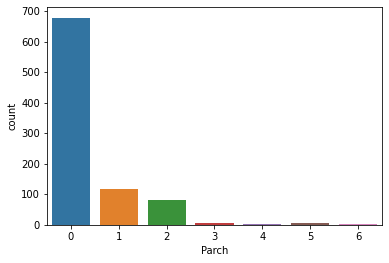

In [156]:
sns.countplot(train_df['Parch'])

In [157]:
train_df.Ticket.value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
CA 2144     6
           ..
113792      1
349216      1
349222      1
350026      1
349209      1
Name: Ticket, Length: 681, dtype: int64

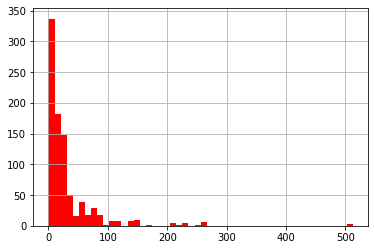

In [158]:
train_df['Fare'].hist(bins = 50, color = 'red')

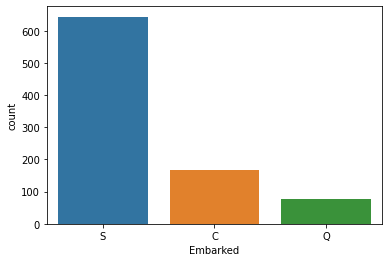

In [159]:
sns.countplot(train_df['Embarked'])

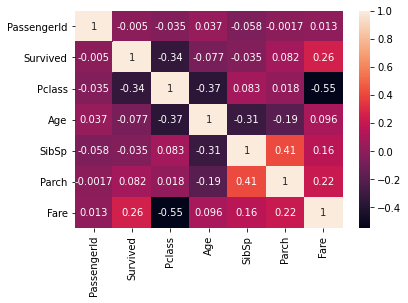

In [160]:
sns.heatmap(train_df.corr(), annot = True)

Age와 Pclass의 상관계수 절대값이 0.37이므로 Age의 결측값을 Pclass를 이용해 처리

In [161]:
age_group = train_df.groupby("Pclass")["Age"]
print(age_group.median()) # Pclass에 따른 Age 평균값

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64


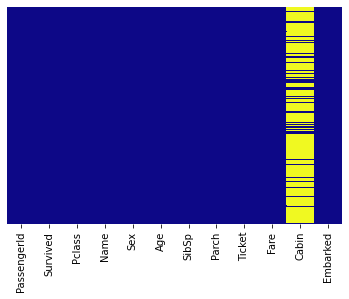

In [162]:
train_df.loc[train_df.Age.isnull(), 'Age'] = train_df.groupby("Pclass").Age.transform('median')
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='plasma')

In [163]:
from statistics import mode

train_df["Embarked"] = train_df["Embarked"].fillna(mode(train_df["Embarked"])) # 최빈값으로 결측치 대처

In [164]:
# categorical feature값을 numeric으로 transform
train_df["Sex"][train_df["Sex"]=="male"] = 0
train_df["Sex"][train_df["Sex"]=="female"] = 1

train_df["Embarked"][train_df["Embarked"]=="S"] = 0
train_df["Embarked"][train_df["Embarked"]=="C"] = 1
train_df["Embarked"][train_df["Embarked"]=="Q"] = 2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/si

In [165]:
train_df["Sex"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: object

In [166]:
train_df["Embarked"]

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: object

In [167]:
train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True) # Name과 Ticket feature는 drop

In [168]:
from sklearn.model_selection import train_test_split

y = train_df['Survived']
X = train_df.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(X_train)

     PassengerId  Pclass Sex   Age  SibSp  Parch      Fare Embarked
30            31       1   0  40.0      0      0   27.7208        1
10            11       3   1   4.0      1      1   16.7000        0
873          874       3   0  47.0      0      0    9.0000        0
182          183       3   0   9.0      4      2   31.3875        0
876          877       3   0  20.0      0      0    9.8458        0
..           ...     ...  ..   ...    ...    ...       ...      ...
534          535       3   1  30.0      0      0    8.6625        0
584          585       3   0  24.0      0      0    8.7125        1
493          494       1   0  71.0      0      0   49.5042        1
527          528       1   0  37.0      0      0  221.7792        0
168          169       1   0  37.0      0      0   25.9250        0

[712 rows x 8 columns]


In [169]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=10000)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [170]:
pred = LR.predict(X_test)

In [172]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred))

[[91  9]
 [29 50]]


TP:91, FP:9, FN:29, TN=50
Accuracy = (TP+TN)/(TP+FN+FP+TN)

In [ ]:
accuracy = np.sum(np.where(pred-y_test==0, 1, 0))/X_test.shape[0]
print(f"accuracy is : {round(accuracy, 2)}")